In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read dataset files
train_df = pd.read_csv('dataset/train_data_cleaned.csv')

In [3]:
#See what the dataset is like
train_df

,age,no_of_children,net_yearly_income,total_family_members,migrant_worker,yearly_debt_payments,credit_limit,credit_limit_used(%),credit_score,prev_defaults,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Unknown,occupation_type_Waiters/barmen staff
0,46,0.0,107934.04,1.0,1.0,33070.28,18690.93,73,544.0,2,...,0,0,0,0,0,0,0,0,1,0
1,29,0.0,109862.62,2.0,0.0,15329.53,37745.19,52,857.0,0,...,0,0,0,0,0,0,0,0,0,0
2,37,0.0,230153.17,2.0,0.0,48416.60,41598.36,43,650.0,0,...,0,0,0,0,0,0,0,0,0,0
3,39,0.0,122325.82,2.0,0.0,22574.36,32627.76,20,754.0,0,...,0,0,0,0,0,0,0,0,0,0
4,46,0.0,387286.00,1.0,0.0,38282.95,52950.64,75,927.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43503,55,2.0,96207.57,4.0,0.0,11229.54,29663.83,82,907.0,0,...,0,0,0,0,0,0,0,0,1,0
43504,31,0.0,383476.74,2.0,1.0,43369.91,139947.16,32,679.0,0,...,0,0,0,0,0,0,0,0,0,0
43505,27,0.0,260052.18,2.0,0.0,22707.51,83961.83,46,727.0,0,...,0,0,0,0,0,0,0,0,0,0
43506,32,0.0,157363.04,2.0,0.0,20150.10,25538.72,92,805.0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Going to work with just the train_df dataset since it has over 40,000 entries
X = train_df.drop('credit_card_default', axis=1)
y = train_df['credit_card_default']
target_names = ["no-default", "default"]

print(X.shape, y.shape)

(43508, 32) (43508,)


In [5]:
#Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

y

0        1
1        0
2        0
3        0
4        0
        ..
43503    0
43504    0
43505    0
43506    0
43507    0
Name: credit_card_default, Length: 43508, dtype: int64

In [6]:
# Scale the data
from sklearn.preprocessing import StandardScaler 
X_scaler = StandardScaler().fit(X_train)

# Transform the X_train and X_test
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

X_train_scaled

array([[-1.04955741,  2.17381579, -0.09796797, ..., -0.15421376,
        -0.67351775, -0.06540624],
       [ 1.04771921, -0.58105471, -0.11857892, ..., -0.15421376,
        -0.67351775, -0.06540624],
       [ 0.41853623,  0.79638054, -0.12292405, ..., -0.15421376,
        -0.67351775, -0.06540624],
       ...,
       [ 0.10394473, -0.58105471, -0.11671169, ..., -0.15421376,
         1.48474187, -0.06540624],
       [ 0.10394473,  0.79638054, -0.04797027, ..., -0.15421376,
        -0.67351775, -0.06540624],
       [ 0.3136724 , -0.58105471,  0.06722366, ..., -0.15421376,
        -0.67351775, -0.06540624]])

In [7]:
#SVM Model
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

In [8]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.981


In [9]:
 # Calculate classification report
from sklearn.metrics import classification_report
predictions = model.predict(X_test_scaled)
print(classification_report(y_test, predictions,
                            target_names=target_names))

              precision    recall  f1-score   support

  no-default       0.98      1.00      0.99      9989
     default       1.00      0.76      0.87       888

    accuracy                           0.98     10877
   macro avg       0.99      0.88      0.93     10877
weighted avg       0.98      0.98      0.98     10877



<AxesSubplot:>

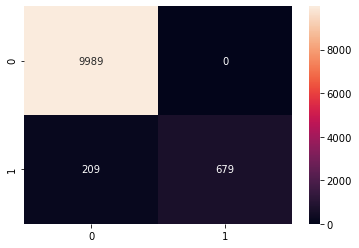

In [10]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test, predictions), annot = True, fmt="d")

In [11]:
predictions_df = pd.DataFrame({"Prediction": predictions})
actual_df = pd.DataFrame({"Actual": y_test})

In [12]:
predictions_df.value_counts()

Prediction
0             10198
1               679
dtype: int64

In [13]:
actual_df.value_counts()

Actual
0         9989
1          888
dtype: int64

In [14]:
#Save the model
import joblib

filename = 'saved_models/SVM_trained.joblib'
joblib.dump(model, filename)

['saved_models/SVM_trained.joblib']

In [ ]:
#Load the model
loaded_model = joblib.load(filename)
print('Test Acc: %.3f' % loaded_model.score(X_test_scaled, y_test))